## Import library & Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## EDA

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

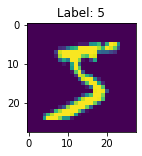

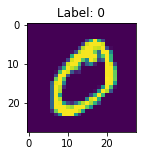

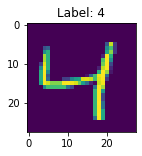

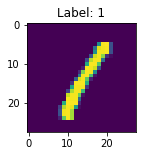

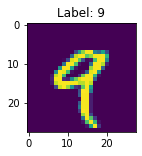

In [5]:
for i in range(0, 5):
    plt.figure(figsize=(2, 2))
    plt.imshow(x_train[i][:, :])
    plt.title(f"Label: {y_train[i]}")
    plt.show()

## Prepare data

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype("float32")/255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype("float32")/255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


## Train & Evaluate model

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.35),
    
    tf.keras.layers.Dense(10, activation = 'softmax')
])

Metal device set to: Apple M1


2021-12-16 10:45:51.990671: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-16 10:45:51.991000: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        1

In [9]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = Adam(lr = 1e-3),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

/Users/wee/miniforge3/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range= 10,
        zoom_range = 0.1,
        width_shift_range = 0.1,
        height_shift_range = 0.1
)

datagen.fit(x_train)

In [11]:
train_generator = datagen.flow(x_train, y_train, batch_size = 64)

validation_generator = datagen.flow(x_test, y_test, batch_size = 64)

In [12]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_loss', patience = 3, verbose = 1, factor = 0.5, min_lr = 1e-6)

model_checkpoint = ModelCheckpoint('./best_model.hdf5',monitor = 'val_loss', mode = "min", verbose = 1, save_best_model = True)

In [13]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = x_train.shape[0] // 64,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = x_test.shape[0] // 64,
    callbacks = [learning_rate_reduction, model_checkpoint]
)

model.save("mnist.h5")

Epoch 1/50


/var/folders/1p/r_fs_z1j6x9_vdytj4kfvcth0000gn/T/ipykernel_5268/815883134.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(
2021-12-16 10:45:52.747750: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-12-16 10:45:53.096321: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


936/937 [============================>.] - ETA: 0s - loss: 0.2677 - accuracy: 0.9175

2021-12-16 10:46:21.838787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: saving model to ./best_model.hdf5
937/937 [==============================] - 31s 27ms/step - loss: 0.2675 - accuracy: 0.9176 - val_loss: 0.0671 - val_accuracy: 0.9783 - lr: 0.0010
Epoch 2/50
935/937 [============================>.] - ETA: 0s - loss: 0.0859 - accuracy: 0.9737
Epoch 00002: saving model to ./best_model.hdf5
937/937 [==============================] - 23s 24ms/step - loss: 0.0858 - accuracy: 0.9737 - val_loss: 0.0461 - val_accuracy: 0.9851 - lr: 0.0010
Epoch 3/50
935/937 [============================>.] - ETA: 0s - loss: 0.0656 - accuracy: 0.9802
Epoch 00003: saving model to ./best_model.hdf5
937/937 [==============================] - 23s 24ms/step - loss: 0.0657 - accuracy: 0.9801 - val_loss: 0.0372 - val_accuracy: 0.9880 - lr: 0.0010
Epoch 4/50
935/937 [============================>.] - ETA: 0s - loss: 0.0576 - accuracy: 0.9826
Epoch 00004: saving model to ./best_model.hdf5
937/937 [==============================] - 23s 25ms/step - loss: 0.0576 - accuracy: 0

937/937 [==============================] - ETA: 0s - loss: 0.0090 - accuracy: 0.9971
Epoch 00028: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 00028: saving model to ./best_model.hdf5
937/937 [==============================] - 23s 24ms/step - loss: 0.0090 - accuracy: 0.9971 - val_loss: 0.0108 - val_accuracy: 0.9963 - lr: 6.2500e-05
Epoch 29/50
936/937 [============================>.] - ETA: 0s - loss: 0.0079 - accuracy: 0.9974
Epoch 00029: saving model to ./best_model.hdf5
937/937 [==============================] - 23s 24ms/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.0107 - val_accuracy: 0.9970 - lr: 3.1250e-05
Epoch 30/50
935/937 [============================>.] - ETA: 0s - loss: 0.0084 - accuracy: 0.9977
Epoch 00030: saving model to ./best_model.hdf5
937/937 [==============================] - 23s 24ms/step - loss: 0.0084 - accuracy: 0.9977 - val_loss: 0.0097 - val_accuracy: 0.9966 - lr: 3.1250e-05
Epoch 31/50
935/937 [============================

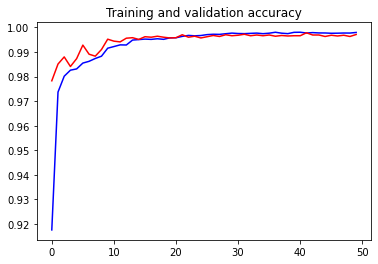

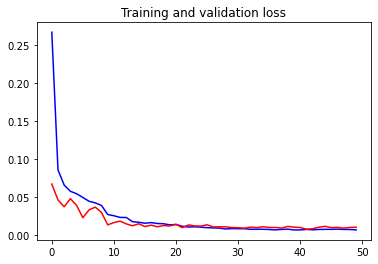

In [14]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = len(accuracy)

plt.plot(range(epochs), accuracy, 'b', label='Training accuracy')
plt.plot(range(epochs), val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(range(epochs), loss, 'b', label='Training Loss')
plt.plot(range(epochs), val_loss, 'r', label='Training Loss')
plt.title('Training and validation loss')

plt.show()